In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('survival_analysis_dataset.csv')

In [3]:
df

,Age,Race,Marital Status,Tstage,Nstage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   Tstage                  4024 non-null   object
 4   Nstage                  4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [8]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
Tstage                    0
Nstage                    0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [9]:
# prompt: categorical columns names

categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Race', 'Marital Status', 'Tstage', 'Nstage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')

In [10]:
# prompt: Unique values of categorical columns

# Assuming df is already defined and loaded as in the previous code

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    print(f" '{col}': {df[col].unique()}")

 'Race': ['White' 'Black' 'Other']
 'Marital Status': ['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
 'Tstage': ['T1' 'T2' 'T3' 'T4']
 'Nstage': ['N1' 'N2' 'N3']
 '6th Stage': ['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
 'differentiate': ['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
 'Grade': ['3' '2' '1' ' anaplastic; Grade IV']
 'A Stage': ['Regional' 'Distant']
 'Estrogen Status': ['Positive' 'Negative']
 'Progesterone Status': ['Positive' 'Negative']
 'Status': ['Alive' 'Dead']


In [11]:
from lifelines import KaplanMeierFitter
from lifelines.plotting import plot_lifetimes

In [12]:
kmf = KaplanMeierFitter()

In [13]:


# Binary Encoding
df['Estrogen Status'] = df['Estrogen Status'].map({'Positive': 1, 'Negative': 0})
df['Progesterone Status'] = df['Progesterone Status'].map({'Positive': 1, 'Negative': 0})
df['Status'] = df['Status'].map({'Alive': 1, 'Dead': 0})
df['A Stage'] = df['A Stage'].map({'Regional': 1, 'Distant': 0})

# Ordinal Encoding
df['Grade'] = df['Grade'].map({'1': 0, '2': 1, '3': 2, 'anaplastic; Grade IV': 3})
df['differentiate'] = df['differentiate'].map({
    'Undifferentiated': 0, 'Poorly differentiated': 1,
    'Moderately differentiated': 2, 'Well differentiated': 3
})
df['Tstage'] = df['Tstage'].map({'T1': 0, 'T2': 1, 'T3': 2, 'T4': 3})
df['Nstage'] = df['Nstage'].map({'N1': 0, 'N2': 1, 'N3': 2})
df['6th Stage'] = df['6th Stage'].map({'IIA': 0, 'IIB': 1, 'IIIA': 2, 'IIIB': 3, 'IIIC': 4})

# One-Hot Encoding
df = pd.get_dummies(df, columns=['Race', 'Marital Status'], drop_first=True)

print(df)

      Age  Tstage  Nstage  6th Stage  differentiate  Grade  A Stage  \
0      68       0       0          0              1    2.0        1   
1      50       1       1          2              2    1.0        1   
2      58       2       2          4              2    1.0        1   
3      58       0       0          0              1    2.0        1   
4      47       1       0          1              1    2.0        1   
...   ...     ...     ...        ...            ...    ...      ...   
4019   62       0       0          0              2    1.0        1   
4020   56       1       1          2              2    1.0        1   
4021   68       1       0          1              2    1.0        1   
4022   58       1       0          1              2    1.0        1   
4023   46       1       0          1              2    1.0        1   

      Tumor Size  Estrogen Status  Progesterone Status  \
0              4                1                    1   
1             35               

In [14]:
df

,Age,Tstage,Nstage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Race_Other,Race_White,Marital Status_Married,Marital Status_Separated,Marital Status_Single,Marital Status_Widowed
0,68,0,0,0,1,2.0,1,4,1,1,24,1,60,1,False,True,True,False,False,False
1,50,1,1,2,2,1.0,1,35,1,1,14,5,62,1,False,True,True,False,False,False
2,58,2,2,4,2,1.0,1,63,1,1,14,7,75,1,False,True,False,False,False,False
3,58,0,0,0,1,2.0,1,18,1,1,2,1,84,1,False,True,True,False,False,False
4,47,1,0,1,1,2.0,1,41,1,1,3,1,50,1,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,0,0,0,2,1.0,1,9,1,1,1,1,49,1,True,False,True,False,False,False
4020,56,1,1,2,2,1.0,1,46,1,1,14,8,69,1,False,True,False,False,False,False
4021,68,1,0,1,2,1.0,1,22,1,0,11,3,69,1,False,True,True,False,False,False
4022,58,1,0,1,2,1.0,1,44,1,1,11,1,72,1,False,False,False,False,False,False


In [15]:


# just print the number of NaN values per column
print("\nNumber of NaN values per column:")
print(df.isnull().sum())


Number of NaN values per column:
Age                          0
Tstage                       0
Nstage                       0
6th Stage                    0
differentiate                0
Grade                       19
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
Race_Other                   0
Race_White                   0
Marital Status_Married       0
Marital Status_Separated     0
Marital Status_Single        0
Marital Status_Widowed       0
dtype: int64


In [16]:
from sklearn.impute import SimpleImputer

# Create an imputer object with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the 'Grade' column
imputer.fit(df[['Grade']])

# Transform the 'Grade' column to fill in missing values
df['Grade'] = imputer.transform(df[['Grade']])

In [17]:


# just print the number of NaN values per column
print("\nNumber of NaN values per column:")
print(df.isnull().sum())


Number of NaN values per column:
Age                         0
Tstage                      0
Nstage                      0
6th Stage                   0
differentiate               0
Grade                       0
A Stage                     0
Tumor Size                  0
Estrogen Status             0
Progesterone Status         0
Regional Node Examined      0
Reginol Node Positive       0
Survival Months             0
Status                      0
Race_Other                  0
Race_White                  0
Marital Status_Married      0
Marital Status_Separated    0
Marital Status_Single       0
Marital Status_Widowed      0
dtype: int64


In [18]:
from lifelines import CoxPHFitter


# Assuming your DataFrame is named 'df', keep only the selected columns and the target columns
selected_columns = ['Age', 'Tumor Size', 'Reginol Node Positive', '6th Stage', 'Estrogen Status', 'Grade', 'Survival Months', 'Status']

# Subset the dataframe to include only the necessary columns
df_subset = df[selected_columns]

In [21]:
# Fit the Cox PH Model 
cox_model = CoxPHFitter()
cox_model.fit(df_subset, duration_col='Survival Months', event_col='Status')

# Display the summary of the model
cox_model.print_summary()


<lifelines.CoxPHFitter: fitted with 4024 total observations, 616 right-censored observations>
             duration col = 'Survival Months'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 4024
number of events observed = 3408
   partial log-likelihood = -24462.08
         time fit was run = 2024-11-30 14:19:23 UTC

---
                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                              
Age                   -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Tumor Size             0.00      1.00      0.00           -0.00            0.00                1.00                1.00
Reginol Node Positive -0.01      0.99      0.01           -0.02            0.01                0.98                1.01
6th Stage              0.00      1.00      0.03           -0.05            0.06                0.95                1.06
Estrogen Status        0.20      1.23      0.08            0.04            0.36                1.04                1.44
Grade                 -0.06      0.94      0.03           -0.12           -0.01                0.89                0.99

                       cmp to     z    p  -log2(p)
covariate                                         
Age                      0.00 -0.44 0.66      0.61
Tumor Size               0.00  0.30 0.76      0.39
Reginol Node Positive    0.00 -0.87 0.38      1.39
6th Stage                0.00  0.09 0.93      0.11
Estrogen Status          0.00  2.49 0.01      6.29
Grade                    0.00 -2.22 0.03      5.26
---
Concordance = 0.52
Partial AIC = 48936.16
log-likelihood ratio test = 16.22 on 6 df
-log2(p) of ll-ratio test = 6.31

The partial log-likelihood in the Cox Proportional Hazards (Cox PH) model is a measure of how well the model fits the observed survival data based on the covariates (predictors) used. Here's a detailed breakdown of what this specific value means:

### What is Partial Log-Likelihood?

**Log-Likelihood:** 
In survival analysis, the likelihood measures how probable the observed data is under the model. The log-likelihood is simply the natural logarithm of this likelihood, which simplifies the computations.

**Partial Log-Likelihood:**

- The Cox PH model does not estimate the full likelihood because it avoids estimating the baseline hazard function \( h_0(t) \). Instead, it focuses only on the contribution of the covariates to the likelihood.
- The partial log-likelihood isolates the effect of the covariates and ignores the baseline hazard. This allows us to assess the relative contributions of the predictors.

### Interpreting -24462.08

This is the value of the partial log-likelihood for your fitted model. A less negative value (closer to 0) generally indicates a better fit of the model to the data.

**Scale:**
- The absolute value of the log-likelihood itself doesn't have much intrinsic meaning. It is used to compare models:
  - When comparing two models, the one with a higher (less negative) log-likelihood value fits the data better.
  - For instance, if you add or remove predictors, the change in partial log-likelihood can help you assess whether the new model is an improvement.

### How is it Used?

**Model Comparison:**

- Use the partial log-likelihood to calculate metrics like Akaike Information Criterion (AIC), which balances model fit and complexity.
- Lower AIC values (derived from log-likelihood) indicate a better model.

**Likelihood Ratio Test:**

- The partial log-likelihood is central to the log-likelihood ratio test, which compares a full model with a reduced one to see if adding predictors significantly improves the model.

### Key Takeaways
- -24462.08 reflects the overall goodness-of-fit for this specific model. However, it is not directly interpretable in isolation.
- To understand its practical implication, compare it with the log-likelihood of alternative models (e.g., models with different sets of predictors). A less negat

# Model performance

1. **Concordance Index (C-Index): 0.52**
   - **Definition:**
     - The Concordance Index (C-Index) measures the predictive accuracy of a survival model. It represents the proportion of all pairs of observations where the predictions and actual outcomes are concordant (i.e., correctly ordered).
     - Values range from 0 to 1:
       - **1.0:** Perfect prediction.
       - **0.5:** Random prediction (no predictive ability).
       - **<0.5:** Worse than random.
   - **Interpretation for 0.52:**
     - The model's predictive performance is only slightly better than random guessing. This suggests that the predictors in the model (e.g., Age, Tumor Size, etc.) might not have a strong relationship with survival outcomes or that additional significant predictors might be missing.

2. **Partial AIC: 48936.16**
   - **Definition:**
     - Akaike Information Criterion (AIC) is a measure used to compare models by balancing goodness-of-fit and model complexity.
     - **Formula*\[
       \t - 2 \cdot (\textlood})
       \]


       where \( k \) is the number of parameters (predictors) in the model.
     - A lower AIC indicates a better model because it reflects a better fit with fewer parameters.
   - **Interpretation for 48936.16:**
     - This is the AIC value for your model. While the value itself is not meaningful in isolation, it can be used to compare with other models:
       - If another model with additional/different predictors has a lower AIC, it suggests that model is a better fit.
       - If the AIC increases, the added complexity of the new model does not improve its predictive performance.

3. **Log-Likelihood Ratio Test: 16.22 on 6 df**
   - **Definition:**
     - The log-likelihood ratio (LLR) test compares the fitted model to a null model (a simpler model without predictors). It checks whether the inclusion of predictors significantly improves the model.
     - **Test               χ2 =2⋅(Log-Likelihood of Full Model−Log-Likelihood of Null Model)
ikelihood of Null Model})
       \]


       Degrees of Freedom (df): The number of predictors being tested (here, 6).
   - **Interpretation for 16.22:**
     - The LLR statistic of 16.22 is compared to a chi-squared distribution with 6 degrees of freedom to compute a p-value.
     - A significant test (small p-value) indicates that the predictors collectively contribute significantly to the model.

4. **-log2(p) of ll-ratio test: 6.31**
   - **Definition:**
     - This is the negative log base 2 of the p-value for the log-likelihood ratio test. A higher value corresponds to a smaller p-value, indicating stronger evidence against the null hypothesis.
     - For example:
       - If \(-log2(p) = 6.31\), then \( p = 2^{-6.31} \approx 0.0104 \).
   - **Interpretation:**
     - With a -log2(p) of 6.31, the p-value is approximately 0.01. This indicates that the predictors collectively contribute significantly to the model (at a significance level of 0.05).

### Summary of Model Performance
- **Concordance (0.52):** The model has poor predictive power, just slightly better than random.
- **Partial AIC (48936.16):** Indicates the balance between model complexity and fit; lower AIC is better.
- **Log-Likelihood Ratio Test (16.22 on 6 df):** Suggests that the predictors collectively have a statistically significant contribution to the model.
- **-log2(p) of ll-ratio test (6.31):** Confirm

# Coefficients Table

### Columns Explained

- **Variable:** The predictors used in the model.

- **Coef (Coefficient):**
  - The log hazard ratio for a one-unit increase in the predictor, holding other variables constant.
  - Positive values indicate a higher hazard (shorter survival), and negative values indicate a lower hazard (longer survival).

- **Exp(Coeff):**
  - The hazard ratio, obtained by exponentiating the coefficient.
  - A value:
    - >1: Increases the hazard.
    - =1: No effect on the hazard.
    - <1: Decreases the hazard.

- **SE(Coeff):**
  - The standard error of the coefficient, representing its variability.

- **Coef Lower 95% and Coef Upper 95%:**
  - The 95% confidence interval for the coefficient. If this range includes 0, the predictor may not be statistically significant.

- **Exp(Coeff) Lower 95% and Exp(Coeff) Upper 95%:**
  - The 95% confidence interval for the hazard ratio.
  - If this range includes 1, the predictor may not be statistically significant.

- **Z:**
  - The Z-score for the hypothesis test that the coefficient is 0.
  - Calculated as \( \text{Coef} / \text{SE(Coeff)} \).

- **P-Value:**
  - Indicates the significance of the predictor.
  - A small value (e.g., <0.05) suggests the predictor is statistically significant.

- **-Log2(P):**
  - The negative log base 2 of the p-value, highlighting the strength of the evidence against the null hypothesis (higher values indicate more significant results).

---

### Interpretation of Variables

1. **Age**
   - **Coef:** -0.00
     - The coefficient is close to 0, indicating no significant relationship between age and hazard.
   - **Exp(Coeff):** 1.00
     - Hazard ratio of 1.00 implies no effect on survival.
   - **P-Value:** 0.66
     - Not statistically significant (p > 0.05).
   - **Conclusion:** Age does not significantly influence survival in this dataset.

2. **Tumor Size**
   - **Coef:** 0.00
     - No meaningful relationship between tumor size and hazard.
   - **Exp(Coeff):** 1.00
     - Hazard ratio of 1.00 implies no effect on survival.
   - **P-Value:** 0.76
     - Not statistically significant (p > 0.05).
   - **Conclusion:** Tumor size does not significantly influence survival.

3. **Reginol Node Positive**
   - **Coef:** -0.01
     - A small negative coefficient suggests a slight protective effect, but it’s very small.
   - **Exp(Coeff):** 0.99
     - A hazard ratio slightly less than 1 implies a very small reduction in hazard.
   - **P-Value:** 0.38
     - Not statistically significant (p > 0.05).
   - **Conclusion:** The number of positive regional nodes does not have a significant impact on survival.

4. **6th Stage**
   - **Coef:** 0.00
     - A near-zero coefficient indicates no meaningful relationship.
   - **Exp(Coeff):** 1.00
     - Hazard ratio of 1.00 implies no effect on survival.
   - **P-Value:** 0.93
     - Not statistically significant (p > 0.05).
   - **Conclusion:** The "6th Stage" variable does not significantly influence survival.

5. **Estrogen Status**
   - **Coef:** 0.20
     - A positive coefficient suggests that being estrogen-positive increases the hazard.
   - **Exp(Coeff):** 1.23
     - Hazard ratio of 1.23 indicates a 23% higher hazard for estrogen-positive cases compared to estrogen-negative cases.
   - **P-Value:** 0.01
     - Statistically significant (p < 0.05).
   - **Conclusion:** Estrogen status is a significant predictor of survival, with estrogen-positive cases having a slightly increased hazard.

6. **Grade**
   - **Coef:** -0.06
     - A small negative coefficient suggests a protective effect.
   - **Exp(Coeff):** 0.94
     - Hazard ratio of 0.94 indicates a 6% reduction in hazard for each unit decrease in grade (higher grade indicates worse differentiation).
   - **P-Value:** 0.03
     - Statistically significant (p < 0.05).
   - **Conclusion:** Tumor grade is a significant predictor of survival, with lower grades (better differentiation) associated with better outcomes.

---

### Overall Observations

- **Significant Predictors:**
  - **Estrogen Status:** Positive estrogen status increases hazard significantly.
  - **Grade:** Lower tumor grade (better differentiation) is associated with improved survival.

- **Non-Significant Predictors:**
  - Age, Tumor Size, Reginol Node Positive, and 6th Stage do not significantly affect survival based on this model.

- **Confidence Intervals:**
  - For non-significant predictors, the confidence intervals include 0 (for coefficients) or 1 (for hazard ratios), indicating their effect is uncertain.
s the significance of predictors with a p-value ≈ 0.01.
ive value indicates a better fit.


<Axes: xlabel='log(HR) (95% CI)'>

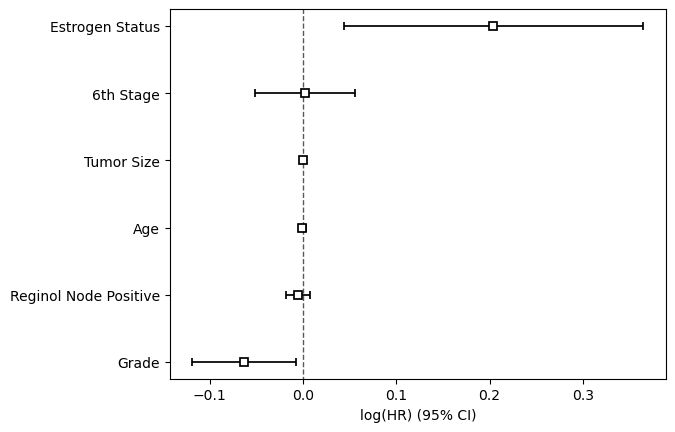

In [22]:
# Plot the coefficients
cox_model.plot()

### Key Elements of the Plot

**X-axis (log(HR)):**
- Represents the log hazard ratios (log(HR)), i.e., the coefficients from the model.
  - Values:
    - > 0: Indicates increased hazard (higher risk of the event).
    - = 0: No effect on the hazard.
    - < 0: Indicates decreased hazard (lower risk of the event).

**Y-axis (Variables):**
- Lists the predictor variables in the model.

**Squares:**
- Represent the estimated coefficients (log hazard ratios) for each variable.

**Horizontal Lines:**
- Show the 95% confidence intervals for the coefficients. If the CI includes 0, the variable is not statistically significant.

**Vertical Dashed Line:**
- Represents the null hypothesis (log(HR) = 0). Predictors with CIs crossing this line are not significant.

---

### Interpretation of Variables

1. **Estrogen Status:**
   - **Position:** The coefficient is positive, and the CI does not cross 0.
   - **Interpretation:** Estrogen status is a statistically significant predictor of hazard, with positive estrogen status increasing the risk.

2. **6th Stage:**
   - **Position:** Coefficient is near 0, and the CI crosses 0.
   - **Interpretation:** Not statistically significant; the 6th stage does not have a reliable impact on hazard.

3. **Tumor Size:**
   - **Position:** Coefficient is near 0, and the CI crosses 0.
   - **Interpretation:** Tumor size does not significantly impact the hazard.

4. **Age:**
   - **Position:** Coefficient is near 0, and the CI crosses 0.
   - **Interpretation:** Age does not have a significant effect on the hazard.

5. **Reginol Node Positive:**
   - **Position:** Coefficient is slightly negative, but the CI crosses 0.
   - **Interpretation:** Not statistically significant; the number of positive regional nodes does not reliably impact the hazard.

6. **Grade:**
   - **Position:** The coefficient is negative, and the CI does not cross 0.
   - **Interpretation:** Grade is statistically significant, with lower grades (better differentiation) reducing the hazard.

---

### General Observations

- **Significant Variables:**
  - **Estrogen Status:** Increased hazard.
  - **Grade:** Reduced hazard.

- **Non-Significant Variables:**
  - Age, Tumor Size, 6th Stage, Reginol Node Positive.

### Insights

- The model highlights the importance of Estrogen Status and Grade as predictors of survival.
- Non-significant variables might  ke assistance with further analysis or adjustments to the model?**
